In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.font_manager import FontProperties

# 设置字体为微软雅黑，大小为15
font = FontProperties(fname=r'msyh.ttf', size=15)

# 生成实验数据
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# 绘制样本显示，cmap为填充彩虹颜色
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

# 决策树分类
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

# 创建visualize_classifier辅助函数，展示分类器的输出
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()  # 获得子图
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

# 输出决策树
visualize_classifier(DecisionTreeClassifier(), X, y)

# 随机森林分类
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# 使用BaggingClassifier组合多个决策树
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

# 随机森林分类
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

C:\Users\lenovo\AppData\Local\Temp\ipykernel_30108\3596153727.py:36: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30108\3596153727.py:36: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30108\3596153727.py:36: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


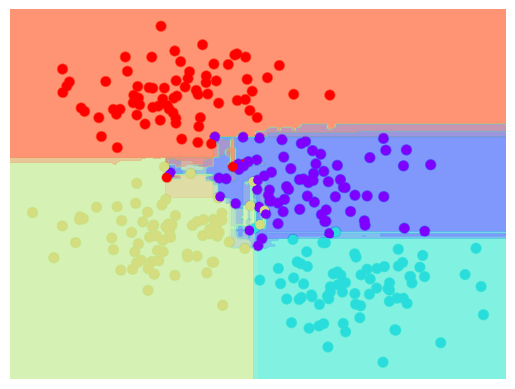

In [29]:
# 设置绘图环境
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.font_manager import FontProperties

# 设置字体为微软雅黑，大小为15
font = FontProperties(fname=r'msyh.ttf', size=15)

# 生成实验数据
from sklearn.datasets import make_blobs  # Updated import

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# 绘制样本显示，cmap为填充彩虹颜色
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

# 决策树分类
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

# 创建visualize_classifier辅助函数，展示分类器的输出
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()  # 获得子图
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

# 输出决策树
visualize_classifier(DecisionTreeClassifier(), X, y)

# 随机森林分类
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# 使用BaggingClassifier组合多个决策树
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

# 随机森林分类
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

# 通过对超过100个随机扰动的模型取平均，最终得到一个整体模型


In [32]:
# 导入必要的库和函数
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# 从原始数据源获取波士顿房价数据集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

# 数据标准化处理
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = ss_y.transform(y_test.reshape(-1, 1)).ravel()

# 构建随机森林回归模型
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_y_predict = rfr.predict(x_test)

# 评估模型
print("随机森林回归的默认评估值为：", rfr.score(x_test, y_test))
print("随机森林回归的R_square的值为：", r2_score(y_test, rfr_y_predict))

# 将 y_test 和 rfr_y_predict 转换为二维数组
y_test_2d = y_test.reshape(-1, 1)
rfr_y_predict_2d = rfr_y_predict.reshape(-1, 1)

print("随机森林回归的均方误差为：", mean_squared_error(ss_y.inverse_transform(y_test_2d), ss_y.inverse_transform(rfr_y_predict_2d)))
print("随机森林回归的平均绝对误差为：", mean_absolute_error(ss_y.inverse_transform(y_test_2d), ss_y.inverse_transform(rfr_y_predict_2d)))

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30108\1924971583.py:11: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


随机森林回归的默认评估值为： 0.837757380515786
随机森林回归的R_square的值为： 0.837757380515786
随机森林回归的均方误差为： 12.580502748031506
随机森林回归的平均绝对误差为： 2.259818897637795
